In [1]:
# used to display image file in this notebook
from IPython.display import Image

# HPRC HUGO24 Workshop - Building and Analyzing Pangenome Graphs
    
## PGGB

### Learning objectives

- build pangenome graphs using pggb
- explore pggb's results
- understand how parameters affect the built pangenome graphs

### Getting started

Make sure you have `pggb` v0.5.4 and its tools installed. It is already available on the course workstations. If you want to build everything on your laptop, follow the instructions at the [pggb homepage](https://github.com/pangenome/pggb) (`guix`, `docker`, `singularity`, and `conda` alternatives are available). So make sure you have checked out pggb repository:

In [2]:
!git clone https://github.com/pangenome/pggb.git

Cloning into 'pggb'...
remote: Enumerating objects: 3611, done.
remote: Counting objects: 100% (1438/1438), done.
remote: Compressing objects: 100% (596/596), done.
remote: Total 3611 (delta 839), reused 1200 (delta 820), pack-reused 2173
Receiving objects: 100% (3611/3611), 14.42 MiB | 16.12 MiB/s, done.
Resolving deltas: 100% (2094/2094), done.


### Build HLA pangenome graphs

The [human leukocyte antigen (HLA)](https://en.wikipedia.org/wiki/Human_leukocyte_antigen) system is a complex of genes on chromosome 6 in humans which encode cell-surface proteins responsible for the regulation of the immune system.

Let's build a pangenome graph from a collection of sequences of the DRB1-3123 gene:

In [3]:
!pggb -i pggb/data/HLA/DRB1-3123.fa.gz -n 12 -t 8 -o out_DRB1_3123

[wfmash::map] Reference = [pggb/data/HLA/DRB1-3123.fa.gz]
[wfmash::map] Query = [pggb/data/HLA/DRB1-3123.fa.gz]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 136
[wfmash::map] Segment length = 5000 (read split allowed)
[wfmash::map] Block length min = 25000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 90%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = /dev/stdout
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 8
[wfmash::skch::Sketch::build] minimizers picked from reference = 2557
[wfmash::skch::Sketch::index] unique minimizers = 660
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 3) ... (22, 1)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, consider all minimizers during lookup.
[wfmash::map] time spent computing the reference index: 0.0135306 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 3.24e+05 bp/s elaps

Run `pggb` without parameters to get information on the meaning of each parameter:

In [4]:
!pggb

ERROR: mandatory arguments -i and -n
ERROR: -n must be greater than or equal to 2
usage: /miniconda/bin/pggb -i <input-fasta> -n <n-haplotypes> [options]
options:
   [wfmash]
    -i, --input-fasta FILE      input FASTA/FASTQ file
    -s, --segment-length N      segment length for mapping [default: 5000]
    -l, --block-length N        minimum block length filter for mapping [default: 5*segment-length]
    -p, --map-pct-id PCT        percent identity for mapping/alignment [default: 90]
    -n, --n-haplotypes N        number of haplotypes
    -N, --no-split              disable splitting of input sequences during mapping [default: enabled]
    -x, --sparse-map N          keep this fraction of mappings ('auto' for giant component heuristic) [default: 1.0]
    -K, --mash-kmer N           kmer size for mapping [default: 19]
    -F, --mash-kmer-thres N     ignore the top % most-frequent kmers [default: 0.001]
    -Y, --exclude-delim C       skip mappings between sequences with the same name 

Take a look at the files in the `out_DRB1_3123` folder.

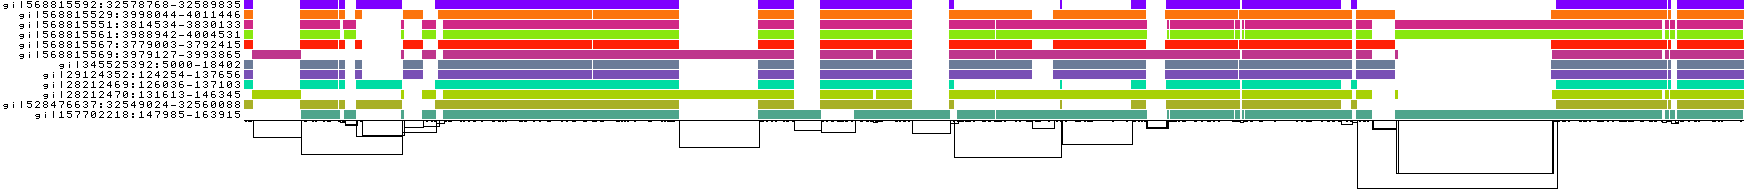

In [5]:
Image(filename='out_DRB1_3123/DRB1-3123.fa.gz.a130aa2.417fcdf.9c6ea4f.smooth.final.og.viz_multiqc.png') 

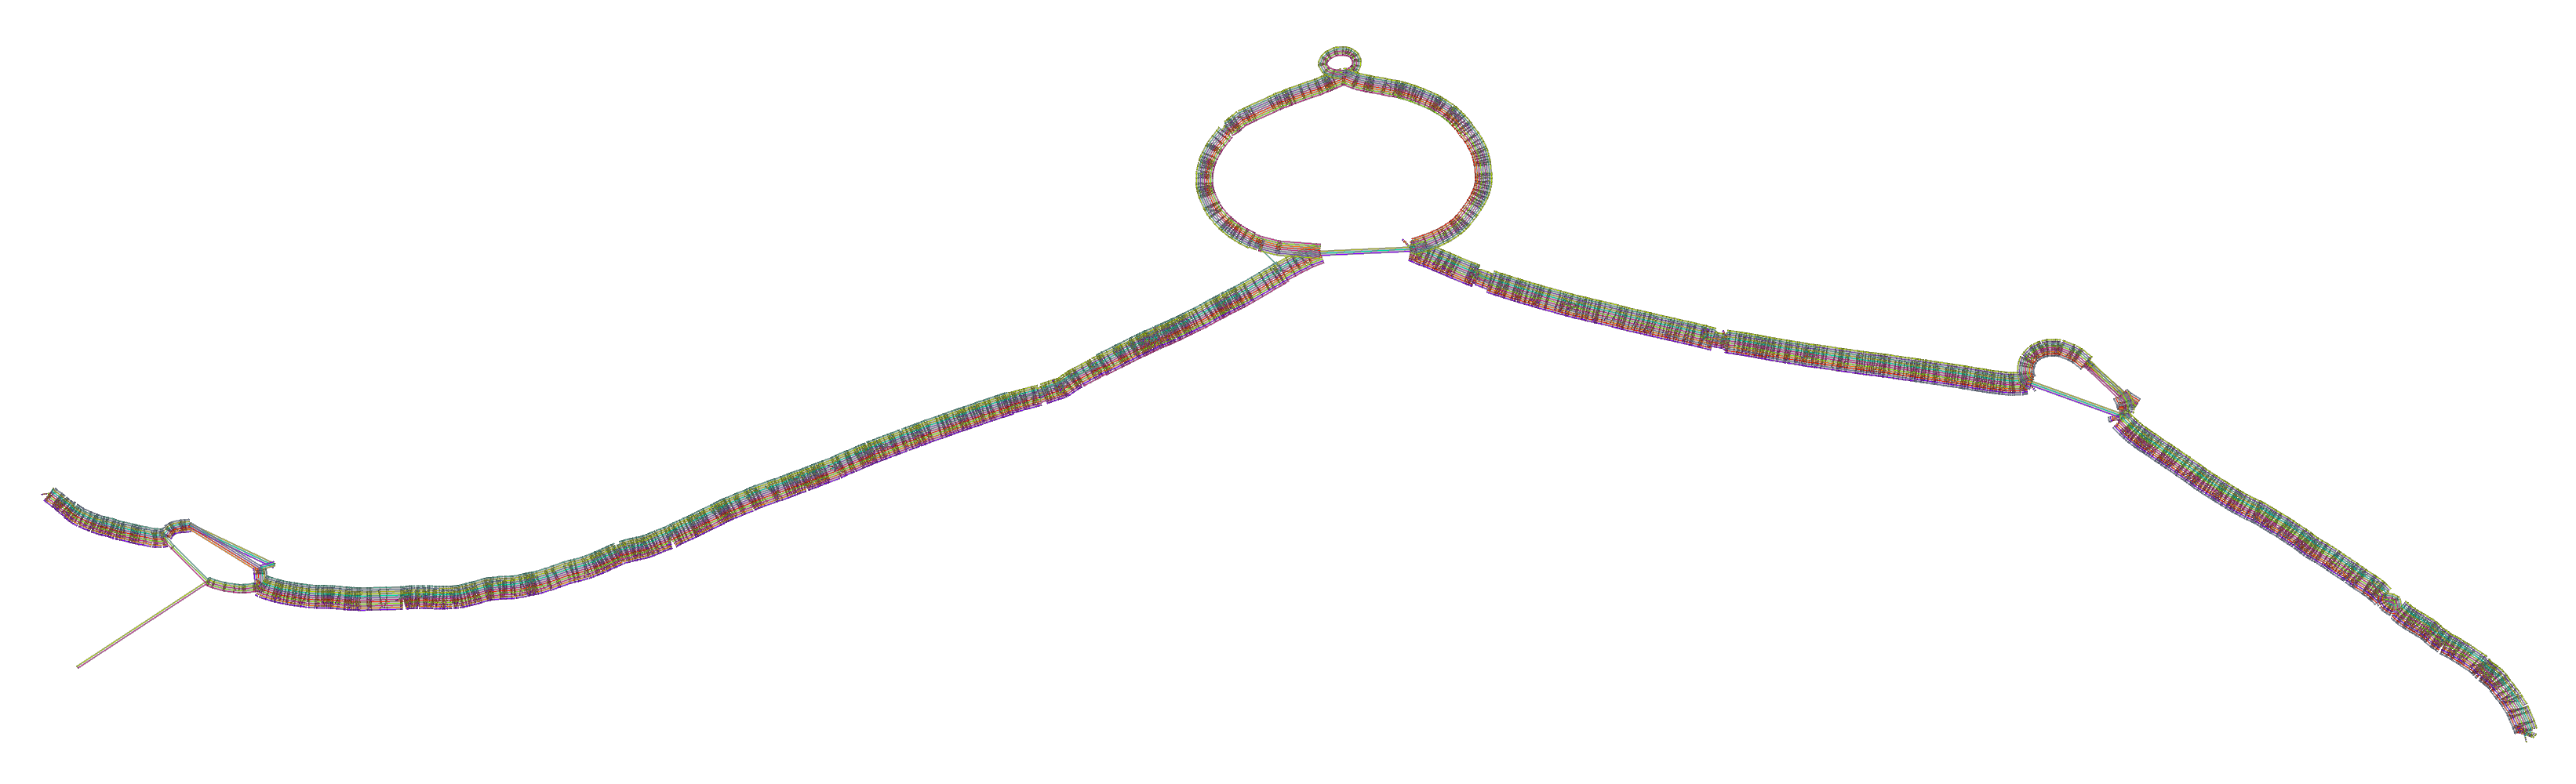

In [6]:
Image(filename='out_DRB1_3123/DRB1-3123.fa.gz.a130aa2.417fcdf.9c6ea4f.smooth.final.og.lay.draw_multiqc.png') 

Why did we specify `-n 12`?
    
<details>
<summary>Click me for the answer</summary>

The pggb graph is defined by the number of mappings per segment of each genome `-n, --n-mappings N`. Ideally, you should set this to equal the number of haplotypes in the pangenome. Because, one expects the `number of haplotypes minus 1` as the maximum number of secondary mappings and alignments. Keep in mind that the total work of alignment is proportional to `N*N`, and these multimappings can be highly redundant. If you provide a `N` that is not equal to the number of haplotypes, provide the actual number of haplotypes to `-H`. This helps smoothxg to determine the right POA problem size.

</details>
<br/>

How many alignments were executed during the pairwise alignment (take a look at the PAF output)? Visualize the alignments:

In [7]:
!pafplot out_DRB1_3123/*.paf --size 2000

See the results at [out_DRB1_3123/DRB1-3123.fa.gz.a130aa2.alignments.wfmash.paf.png](out_DRB1_3123/DRB1-3123.fa.gz.a130aa2.alignments.wfmash.paf.png).

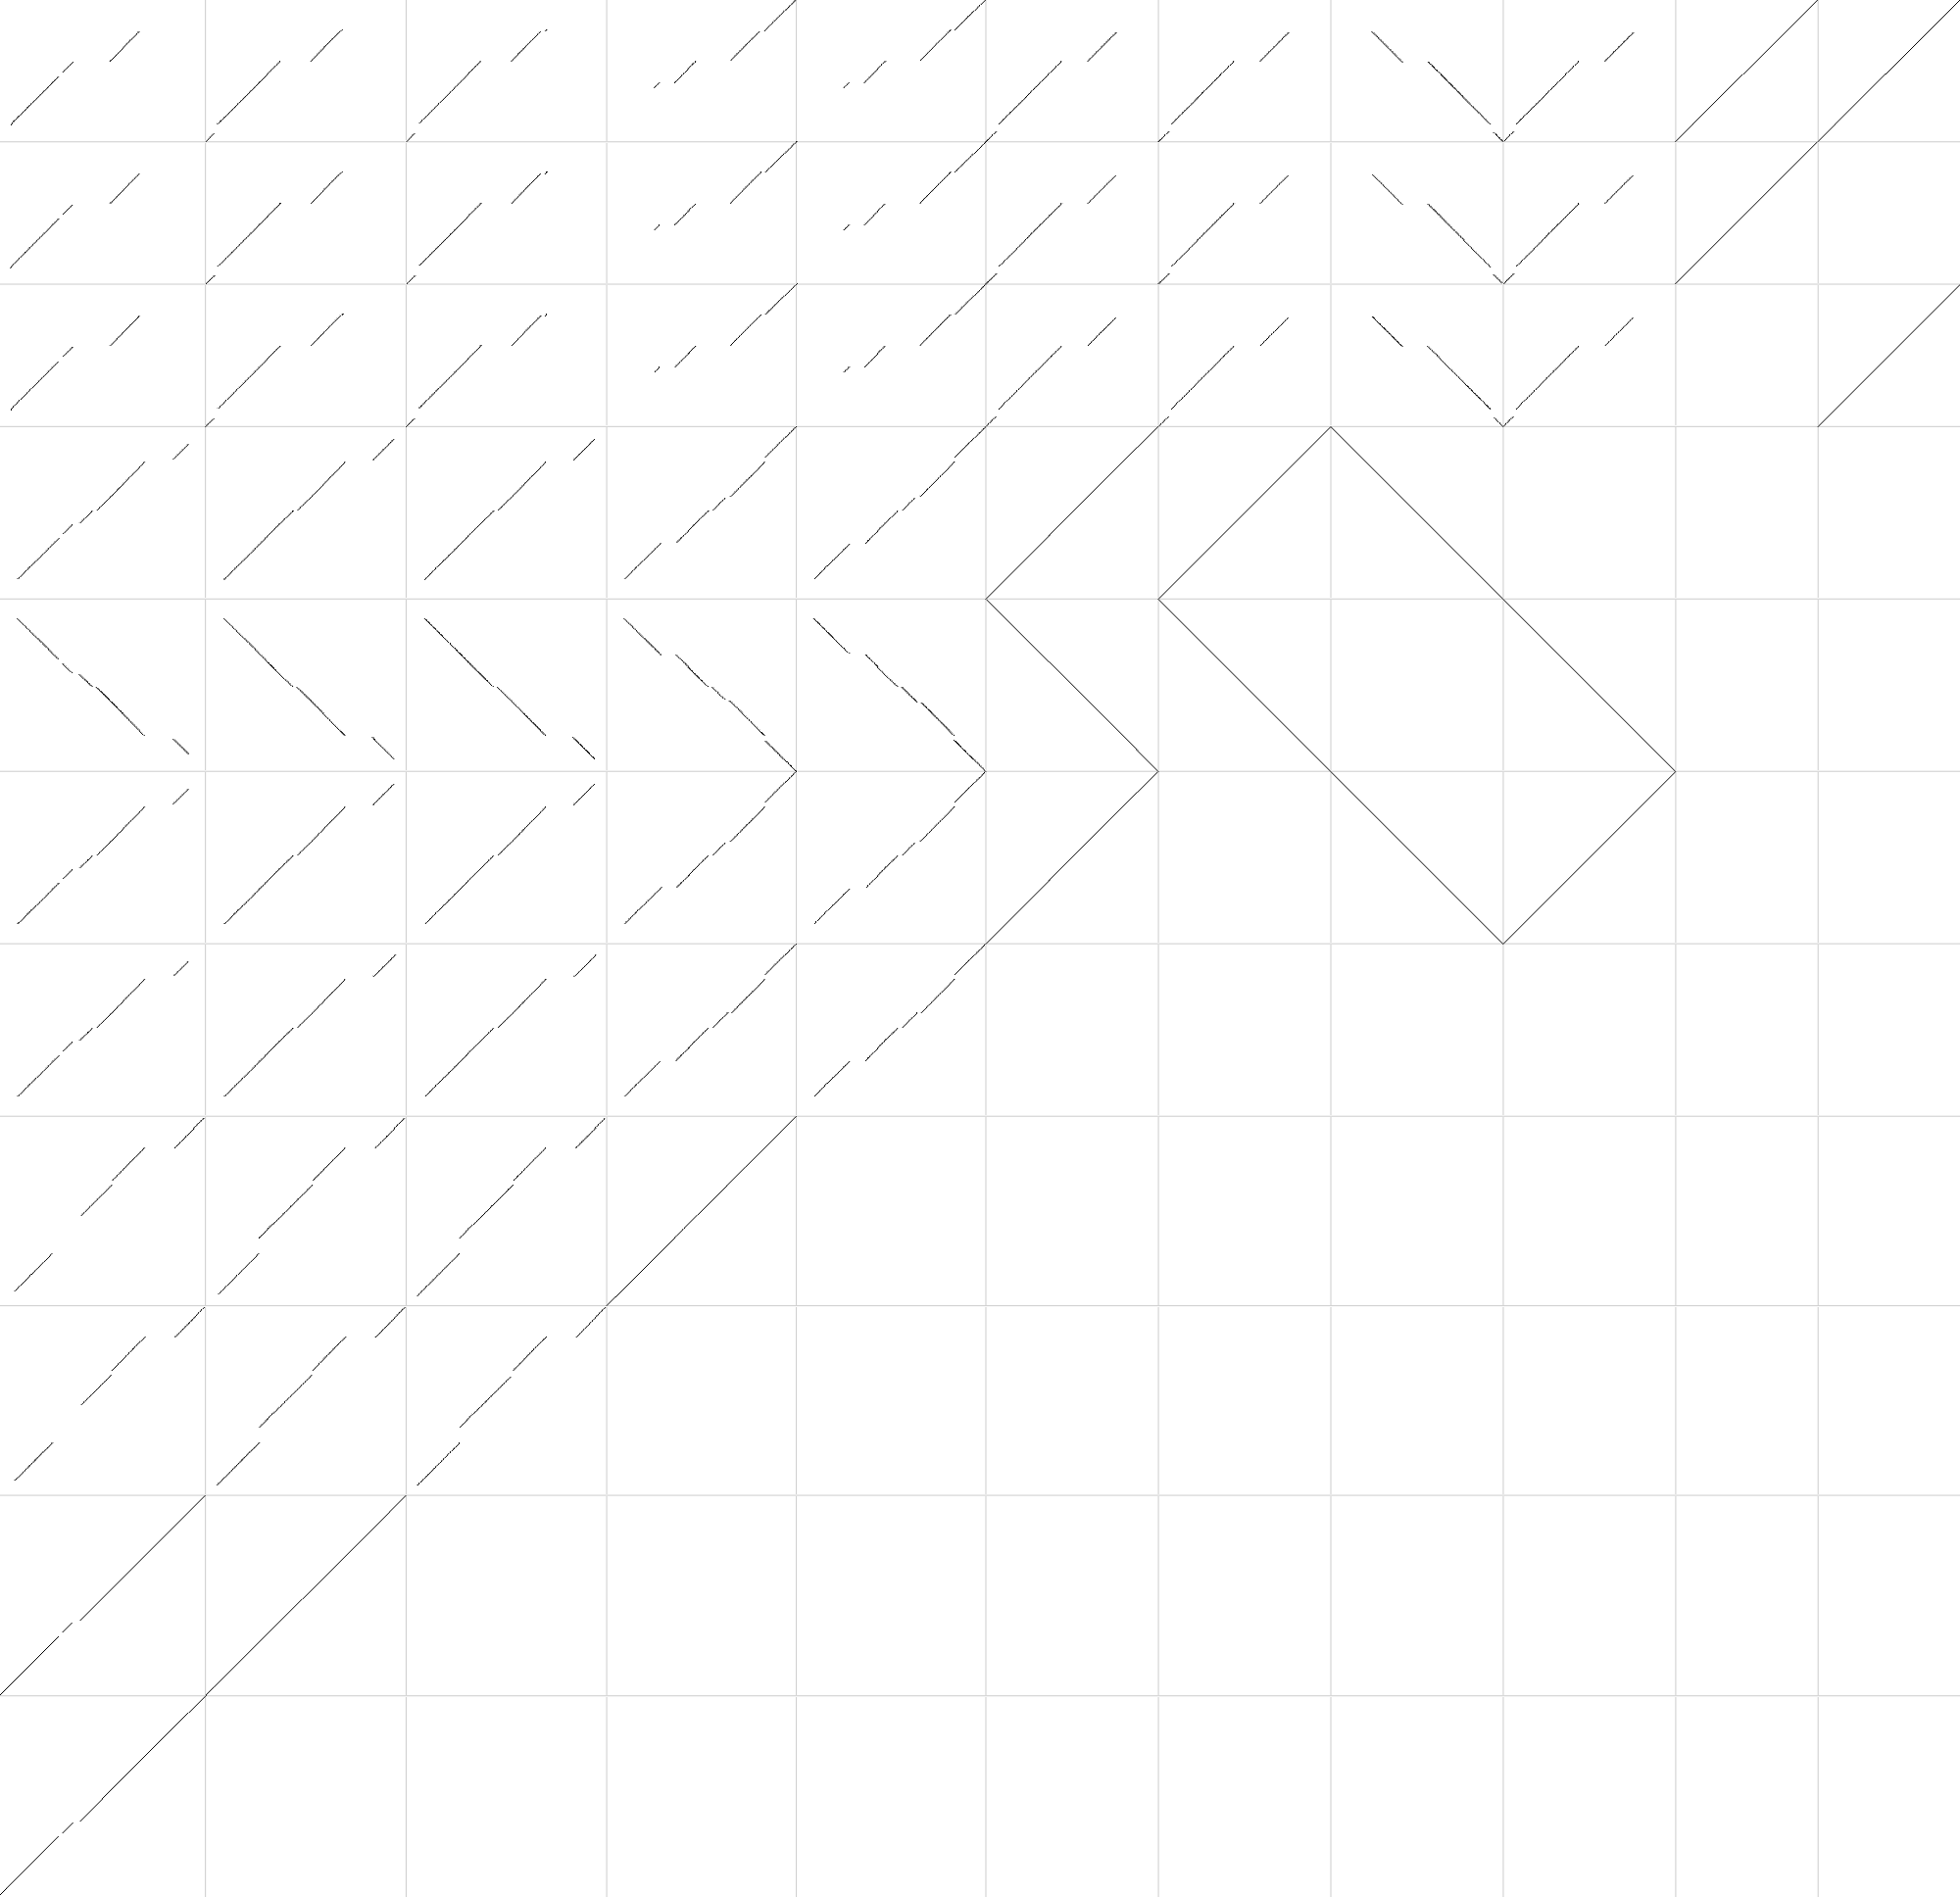

In [8]:
Image(filename='out_DRB1_3123/DRB1-3123.fa.gz.a130aa2.alignments.wfmash.paf.png') 

Use `odgi stats` to obtain the graph length, and the number of nodes, edges, and paths. Do you think the resulting pangenome graph represents the input sequences well? Check the length and the number of the input sequences to answer this question.

In [9]:
!odgi stats -Si out_DRB1_3123/DRB1-3123.fa.gz.a130aa2.417fcdf.9c6ea4f.smooth.final.og

#length	nodes	edges	paths	steps
22624	4810	6590	12	34086


In [10]:
!odgi paths -Lli out_DRB1_3123/DRB1-3123.fa.gz.a130aa2.417fcdf.9c6ea4f.smooth.final.og

gi|568815592:32578768-32589835	1	11068
gi|568815529:3998044-4011446	1	13403
gi|568815551:3814534-3830133	1	15600
gi|568815561:3988942-4004531	1	15590
gi|568815567:3779003-3792415	1	13413
gi|568815569:3979127-3993865	1	14739
gi|345525392:5000-18402	1	13403
gi|29124352:124254-137656	1	13403
gi|28212469:126036-137103	1	11068
gi|28212470:131613-146345	1	14733
gi|528476637:32549024-32560088	1	11065
gi|157702218:147985-163915	1	15931


<details>
<summary>Click me for the answer</summary>
    
The total graph length is much longer than the length of most of the input sequences. This indicates an underalignment of all the sequences.

</details>
<br/>

How many blocks were selected and 'smoothed' during the two rounds of graph normalization?

<details> 
<summary>Hint</summary>
    
Take a look at the `*.log` file to answer this question.

</details>
<br />

Try building the same pangenome graph by specifying a lower percent identity (`-p 90` by default):

In [11]:
!pggb -i pggb/data/HLA/DRB1-3123.fa.gz -p 80 -n 12 -t 8 -o out2_DRB1_3123

[wfmash::map] Reference = [pggb/data/HLA/DRB1-3123.fa.gz]
[wfmash::map] Query = [pggb/data/HLA/DRB1-3123.fa.gz]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 67
[wfmash::map] Segment length = 5000 (read split allowed)
[wfmash::map] Block length min = 25000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 80%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = /dev/stdout
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 8
[wfmash::skch::Sketch::build] minimizers picked from reference = 4829
[wfmash::skch::Sketch::index] unique minimizers = 1239
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 7) ... (22, 1)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, consider all minimizers during lookup.
[wfmash::map] time spent computing the reference index: 0.0140924 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 3.23e+05 bp/s elaps

Check graph statistics. Does this pangenome graph represent better or worse the input sequences than the previously produced graph?

In [12]:
!odgi stats -Si out2_DRB1_3123/DRB1-3123.fa.gz.3b702c0.417fcdf.70ef01d.smooth.final.og

#length	nodes	edges	paths	steps
21807	4871	6676	12	34675


<details>
    
<summary>Click me for the answer</summary>
The total graph length is now closer to each length of most of the input sequences.
</details>
<br />

Try to decrease the number of mappings to keep for each segment:

In [13]:
!pggb -i pggb/data/HLA/DRB1-3123.fa.gz -p 80 -n 6 -t 8 -o out3_DRB1_3123

[wfmash::map] Reference = [pggb/data/HLA/DRB1-3123.fa.gz]
[wfmash::map] Query = [pggb/data/HLA/DRB1-3123.fa.gz]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 67
[wfmash::map] Segment length = 5000 (read split allowed)
[wfmash::map] Block length min = 25000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 80%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = /dev/stdout
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 8
[wfmash::skch::Sketch::build] minimizers picked from reference = 4829
[wfmash::skch::Sketch::index] unique minimizers = 1239
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 7) ... (22, 1)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, consider all minimizers during lookup.
[wfmash::map] time spent computing the reference index: 0.0231783 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 3.27e+05 bp/s elaps

How does it affect the graph?

In [14]:
!odgi stats -Si out3_DRB1_3123/DRB1-3123.fa.gz.9a56e7b.417fcdf.351a3ab.smooth.final.og

#length	nodes	edges	paths	steps
36980	3297	4424	12	12690


Try to increase the target sequence length for the partial order alignment (POA) problem (`-G 700,900,1100` by default):

In [15]:
!pggb -i pggb/data/HLA/DRB1-3123.fa.gz -p 80 -n 12 -t 8 -G 1400,1800,2200 -o out4_DRB1_3123

[wfmash::map] Reference = [pggb/data/HLA/DRB1-3123.fa.gz]
[wfmash::map] Query = [pggb/data/HLA/DRB1-3123.fa.gz]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 67
[wfmash::map] Segment length = 5000 (read split allowed)
[wfmash::map] Block length min = 25000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 80%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = /dev/stdout
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 8
[wfmash::skch::Sketch::build] minimizers picked from reference = 4829
[wfmash::skch::Sketch::index] unique minimizers = 1239
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 7) ... (22, 1)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, consider all minimizers during lookup.
[wfmash::map] time spent computing the reference index: 0.0215799 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 3.18e+05 bp/s elaps

How is this changing the runtime and the memory usage? How is this affecting graph statistics? How many blocks were selected and 'smoothed' during the two rounds of graph normalization?

In [18]:
!odgi stats -Si out4_DRB1_3123/DRB1-3123.fa.gz.3b702c0.417fcdf.ce2fa85.smooth.final.og

#length	nodes	edges	paths	steps
23623	4749	6485	12	32780


In [20]:
!cat out4_DRB1_3123/DRB1-3123.fa.gz.3b702c0.417fcdf.ce2fa85.smooth.04-15-2024_14:14:25.log

Starting pggb on 04-15-2024_14:14:25

Command: /miniconda/bin/pggb -i pggb/data/HLA/DRB1-3123.fa.gz -p 80 -n 12 -t 8 -G 1400,1800,2200 -o out4_DRB1_3123

PARAMETERS

general:
  input-fasta:        pggb/data/HLA/DRB1-3123.fa.gz
  output-dir:         out4_DRB1_3123
  temp-dir:           out4_DRB1_3123
  resume:             false
  compress:           false
  threads:            8
  poa_threads:        8
wfmash:
  version:            v0.10.3-3-g8ba3c53
  segment-length:     5000
  block-length:       25000
  map-pct-id:         80
  n-mappings:         12
  no-splits:          false
  sparse-map:         false
  mash-kmer:          19
  mash-kmer-thres:    0.001
  exclude-delim:      false
  no-merge-segments:  false
seqwish:
  version:            v0.7.9-0-gd9e7ab5
  min-match-len:      19
  sparse-factor:      0
  transclose-batch:   10000000
smoothxg:
  version:            v0.7.0-0-g66d3044
  skip-normalization: false
  n-haps:             12
  path-jump-max:      0
  edge-jump-max:    

<details>
    
<summary>Hint</summary>

Take a look at the `*.log` file to answer this question.

</details>
<br />

Take the second `pggb` run and try to increase the segment length (`-s 5000` by default):

In [21]:
!pggb -i pggb/data/HLA/DRB1-3123.fa.gz -s 20000 -p 80 -n 12 -t 8 -o out5_DRB1_3123

[wfmash::map] Reference = [pggb/data/HLA/DRB1-3123.fa.gz]
[wfmash::map] Query = [pggb/data/HLA/DRB1-3123.fa.gz]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 256
[wfmash::map] Segment length = 20000 (read split allowed)
[wfmash::map] Block length min = 100000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 80%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = /dev/stdout
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 8
[wfmash::skch::Sketch::build] minimizers picked from reference = 1346
[wfmash::skch::Sketch::index] unique minimizers = 345
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 3) ... (12, 7)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, consider all minimizers during lookup.
[wfmash::map] time spent computing the reference index: 0.0236606 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 3.19e+05 bp/s ela

How is this affecting graph statistics? Why?

In [22]:
!odgi stats -Si out5_DRB1_3123/DRB1-3123.fa.gz.0889e72.417fcdf.70ef01d.smooth.final.og

#length	nodes	edges	paths	steps
70768	55	69	12	94


<details>
<summary>Hint</summary>

Hint: The length of a segment for mapping is now so large for the given sequence identity, that some mappings are not possible anymore.

</details>
<br/>


## nf-core/pangenome

### Learning objectives

In this exercise you learn how to

- run a [nf-core](https://nf-co.re/) [Nextflow](https://www.nextflow.io/) pipeline,
- configure the resources according to what is available,
- deal with alternative parameter names,
- understand the [nf-core/pangenome](https://github.com/nf-core/pangenome) pipeline's output:
  - [MutiQC](https://multiqc.info/),
  - used CPU, RAM, ...
  - workflow timeline,
  - output folders

### Getting started

Make sure you have `wget`, `git`, `Nextflow`, and `Docker` installed. All tools are already available on the course notebook's server.

One can distribute the available compute resources efficiently across the different processes of the Nextflow pipeline using [config](https://www.nextflow.io/docs/latest/config.html) files. During the course you have access to 8 threads with 16 gigabytes of memory. To ensure that each run only consumes up to these resources, please create a config file `hprc_hugo24.config` with the following:

```
executor {
  cpus = 8
  memory = 16.GB
}
```   

### Prepare input data

**This is only needed if you use the "lightweight" docker image and need to download/prepare the large files.**
If you are using the docker image from Zenodo (from `curl XXX | docker load`) you can skip this part.

Download and unzip the HPRC PGGB chrY graph.

In [29]:
!wget https://s3-us-west-2.amazonaws.com/human-pangenomics/pangenomes/freeze/freeze1/pggb/chroms/chrY.hprc-v1.0-pggb.gfa.gz
!gunzip chrY.hprc-v1.0-pggb.gfa.gz

--2024-04-15 14:18:44--  https://s3-us-west-2.amazonaws.com/human-pangenomics/pangenomes/freeze/freeze1/pggb/chroms/chrY.hprc-v1.0-pggb.gfa.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.204.128, 52.218.133.32, 52.92.208.56, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20000273 (19M) [binary/octet-stream]
Saving to: ‘chrY.hprc-v1.0-pggb.gfa.gz’

chrY.hprc-v1.0-pggb 100%[===================>]  19.07M  3.17MB/s    in 6.6s    

2024-04-15 14:18:52 (2.91 MB/s) - ‘chrY.hprc-v1.0-pggb.gfa.gz’ saved [20000273/20000273]



We want to build a graph with 4 haplotypes, so we need to extract a subset from all the sequences in the graph:

In [30]:
# extract all sequences in FASTA format with ODGI
!odgi paths -i chrY.hprc-v1.0-pggb.gfa -f -t 32 -P > chrY.hprc-v1.0-pggb.gfa.fa
# index the FASTA
!samtools faidx chrY.hprc-v1.0-pggb.gfa.fa

[odgi::paths] warning: the given file "chrY.hprc-v1.0-pggb.gfa" is not in ODGI format. To save time in the future, please use odgi build -i=[FILE], --idx=[FILE] -o=[FILE], --out=[FILE] to generate a graph in ODGI format. Such a graph can be supplied to all ODGI subcommands. Building graph in ODGI format from given GFA.
[odgi::gfa_to_handle] building nodes: 100.00% @ 6.36e+05 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
[odgi::gfa_to_handle] building edges: 100.00% @ 8.82e+05 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
[odgi::gfa_to_handle] building paths: 100.00% @ 2.05e+02 bp/s elapsed: 00:00:00:01 remain: 00:00:00:00


We select the two references CHM13, GRCH38, and the 2 haplotypes of the HG01978 diploid sample:    

In [31]:
!grep "chm13\|grch38\|HG01978" chrY.hprc-v1.0-pggb.gfa.fa.fai | cut -f 1 > chrY.pan4.txt
# fetch the sequences of the desired haplotypes
!samtools faidx chrY.hprc-v1.0-pggb.gfa.fa -r chrY.pan4.txt > chrY.hprc.pan4.fa
# zip it
!bgzip chrY.hprc.pan4.fa
# index the FASTA
!samtools faidx chrY.hprc.pan4.fa.gz

Save the new files to a `data` folder and remove temporary files.

In [32]:
!mkdir -p ../data
!mv chrY.hprc.pan4.fa.gz* ../data/
!rm chrY.hprc-v1.0-pggb.gfa chrY.hprc-v1.0-pggb.gfa.fa* chrY.pan4.txt 

### Building an HPRC 4 haplotypes chrY pangenome graph with nf-core/pangenome

Whilst we can limit the maximum allocatable resources with `hprc_hugo24.config`, one can assign resources for each step of the pipeline using a different config file called `chrY.hprc.pan4.config`:

```
process {
    withName:'MULTIQC|MULTIQC_COMMUNITY|SAMTOOLS_FAIDX|CUSTOM_DUMPSOFTWAREVERSIONS' {
    // these tools can only make use of one thread and need little RAM
        cpus = 1
        memory = 1.GB
    }

    withName:'TABIX_BGZIP|ODGI_STATS|WFMASH_ALIGN|VG_DECONSTRUCT' {
        cpus = 4
        memory = 8.GB
    }

    withName:'WFMASH_MAP_ALIGN|WFMASH_MAP|SEQWISH|ODGI_BUILD|ODGI_UNCHOP|ODGI_SORT|ODGI_LAYOUT|WFMASH_MAP_COMMUNITY|ODGI_SQUEEZE' {
        cpus = 8
        memory = 16.GB
    }

    withName:'SMOOTHXG' {
        cpus = 8
        memory = 16.GB
    }

    withName:'GFAFFIX|ODGI_VIEW|ODGI_VIZ*|ODGI_DRAW|SPLIT_APPROX_MAPPINGS_IN_CHUNKS|PAF2NET|NET2COMMUNITIES|EXTRACT_COMMUNITIES' {
        // these tools can only make use of one thread and need medium RAM
        cpus = 1
        memory = 8.GB
    }
}
```

Let's build the chromosome 20 pangenome graph. If you are interested in setting additional parameters you can always visit https://nf-co.re/pangenome/1.1.2/parameters for details. All parameters starting with one `-` are handed over to Nextflow, all parameters starting with two `-` are handled by the pipeline itself:

If you are using the docker image from Zenodo (from `curl XXX | docker load`) you can use the Singularity images that were already cached:

In [ ]:
# WARNING: For a better user experience run the line below in a terminal: Click "+" -> click "Terminal" -> "cd pggb".
!NXF_SINGULARITY_CACHEDIR=/singularity_cache nextflow run nf-core/pangenome -r 1.1.2 --input ../data/chrY.hprc.pan4.fa.gz --outdir chrY.hprc.pan4_out --n_haplotypes 4 --wfmash_map_pct_id 98 --wfmash_segment_length 10k --wfmash_n_mappings 3 --seqwish_min_match_length 311 --smoothxg_poa_length "1000," -c hprc_hugo24.config,chrY.hprc.pan4.config --wfmash_exclude_delim '#' -profile singularity --wfmash_chunks 4
# There might be an ERROR:
# FATAL:   container creation failed: mount /proc/self/fd/4->/var/lib/singularity/mnt/session/rootfs error: while mounting image /proc/self/fd/4: failed to find loop device: could not attach image file to loop device: no loop devices available
# Please just re-run this cell, it should work then!

Otherwise, if you use the "lightweight" docker image, there is no Singularity cache to use, you will download the images on the fly (which can take a few minutes):

In [33]:
# WARNING: For a better user experience run the line below in a terminal: Click "+" -> click "Terminal" -> "cd pggb".
!nextflow run nf-core/pangenome -r 1.1.2 --input ../data/chrY.hprc.pan4.fa.gz --outdir chrY.hprc.pan4_out --n_haplotypes 4 --wfmash_map_pct_id 98 --wfmash_segment_length 10k --wfmash_n_mappings 3 --seqwish_min_match_length 311 --smoothxg_poa_length "1000," -c hprc_hugo24.config,chrY.hprc.pan4.config --wfmash_exclude_delim '#' -profile singularity --wfmash_chunks 4
# There might be an ERROR:
# FATAL:   container creation failed: mount /proc/self/fd/4->/var/lib/singularity/mnt/session/rootfs error: while mounting image /proc/self/fd/4: failed to find loop device: could not attach image file to loop device: no loop devices available
# Please just re-run this cell, it should work then!

CAPSULE: Downloading dependency org.multiverse:multiverse-core:jar:0.7.0wait .. 2/3 KB   
CAPSULE: Downloading dependency org.apache.ivy:ivy:jar:2.5.1
CAPSULE: Downloading dependency org.codehaus.groovy:groovy:jar:3.0.19
CAPSULE: Downloading dependency commons-io:commons-io:jar:2.11.0
CAPSULE: Downloading dependency com.google.guava:listenablefuture:jar:9999.0-empty-to-avoid-conflict-with-guava
CAPSULE: Downloading dependency com.beust:jcommander:jar:1.35
CAPSULE: Downloading dependency jline:jline:jar:2.9
CAPSULE: Downloading dependency org.codehaus.groovy:groovy-xml:jar:3.0.19
CAPSULE: Downloading dependency org.slf4j:log4j-over-slf4j:jar:2.0.7
CAPSULE: Downloading dependency com.github.zafarkhaja:java-semver:jar:0.9.0
CAPSULE: Downloading dependency io.nextflow:nf-commons:jar:23.10.1
CAPSULE: Downloading dependency io.nextflow:nf-httpfs:jar:23.10.1
CAPSULE: Downloading dependency javax.mail:mail:jar:1.4.7
CAPSULE: Downloading dependency com.fasterxml.jackson.core:jackson-annotations

<details>
<summary>Click me for the explanations of some Nextflow parameters</summary>
    
 - `nextflow run`: Execute a Nextflow pipeline.
 - `nf-core/pangenome -r 1.1.2`: Select pipeline https://github.com/nf-core/pangenome for execution in its version 1.1.2.
 - `--n_haplotypes 4`: We have 4 haplotypes as input.
 - `--wfmash_map_pct_id 98`: Genomic sequences of human vary by ~2%.
 - `--wfmash_n_mappings 3`: We want to retain 3 mappings for each segment, because each segment could map to 3 other haplotypes. 
 - `seqwish_min_match_length 311`: Filter exact matches below this length. This can smooth the graph locally and prevent the formation of complex local graph topologies from forming due to differential alignments.
 - `--wfmash_exclude_delim '#'`: Our input sequences follows the pansn spec so the idea is to skip mappings when the query and target have the same
prefix: '#'. Since our sample `HG01978` still consists of contigs, this will reduce our mapping problem and speed up `WFMASH_MAP`.
 - `--wfmash_chunks 4`: One advantage that `nf-core/pangenome` has over `pggb` is that it can parallelize the often heavy base-pair level alignments across nodes of a cluster. The parameter `--wfmash_chunks` determines into how many equally large subproblems the alignments should be split after the `WFMASH_MAP` process. It is recommended that this number roughly fits the number of available nodes one has. During the course, a full cluster is not available, so we are improvising. In `chrY.hprc.pan4.config` the number of CPUs for `WFMASH_ALIGN` is set to 8. Assuming we are able to run this in parallel on our 8T/16GB machine, one can expect that at most 2 `WFMASH_ALIGN` process can be executed in parallel.
</details>
<br />

*In which folder can the final ODGI graph be found? And in which folder in the final GFA graph?*

<details>
<summary>Click me for the answer</summary>
    
 - ODGI: *FINAL_ODGI*
 - GFA: *FINAL_GFA*
</details>
    
Open the MultiQC report and other statistics on your local machine in order to take a closer look.

    chrY.hprc.pan4_out/multiqc/multiqc_report.html .
    chrY.hprc.pan4_out/pipeline_info/execution_*.html .
    chrY.hprc.pan4_out/pipeline_info/pipeline_dag_*.html .

In the MultiQC report you will find vital graph statistics, lots of 1D graph visualizations and a 2D graph visualization serving both as quantitative and qualitative graph validation information. In `execution_report_*.html*` you can find an overview of the executed pipeline and especially the resource consumption of each process of the pipeline. If you notice that a process is consuming much less RAM than it was given in `chrY.hprc.pan4.config` you would want to adjust this in future runs. Assuming you want to run `nf-core/pangenome` on a cluster, it is crucial to limit the allocated resources for each process, so your jobs usually have a higher chance to be submitted by the cluster scheduler. In `execution_timeline_*.html` one can observe when which process was executed and which processes were submitted in parallel, assuming resources were available.

## ODGI
### Learning objectives

- extract subgraphs representing loci of interest
- visualize graph annotation
- make phylogenetic trees

### Getting started

Check out odgi repository (we need one of its example):

In [34]:
!git clone https://github.com/pangenome/odgi.git

Cloning into 'odgi'...
remote: Enumerating objects: 17130, done.
remote: Counting objects: 100% (1455/1455), done.
remote: Compressing objects: 100% (495/495), done.
remote: Total 17130 (delta 1037), reused 1282 (delta 957), pack-reused 15675
Receiving objects: 100% (17130/17130), 25.20 MiB | 21.14 MiB/s, done.
Resolving deltas: 100% (13114/13114), done.


### Exploring the HPRC chromosome 6 pangenome graph

Download the pangenome graph of the Human chromosome 6 in GFA format, decompress it, and convert it to a graph in odgi format.    

#### Prepare input data

**This is only needed if you use the "lightweight" docker image and need to download/prepare the large files.**
If you are using the docker image from Zenodo (from `curl XXX | docker load`) you can skip this part.

In [35]:
!wget https://s3-us-west-2.amazonaws.com/human-pangenomics/pangenomes/scratch/2021_11_16_pggb_wgg.88/chroms/chr6.pan.fa.a2fb268.4030258.6a1ecc2.smooth.gfa.gz
!gunzip chr6.pan.fa.a2fb268.4030258.6a1ecc2.smooth.gfa.gz
!odgi build -g chr6.pan.fa.a2fb268.4030258.6a1ecc2.smooth.gfa -o ../data/chr6.pan.og -t 8 -P
!rm chr6.pan.fa.a2fb268.4030258.6a1ecc2.smooth.gfa

--2024-04-15 14:27:40--  https://s3-us-west-2.amazonaws.com/human-pangenomics/pangenomes/scratch/2021_11_16_pggb_wgg.88/chroms/chr6.pan.fa.a2fb268.4030258.6a1ecc2.smooth.gfa.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.168.144, 52.218.176.232, 52.92.136.176, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.168.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 765189457 (730M) [binary/octet-stream]
Saving to: ‘chr6.pan.fa.a2fb268.4030258.6a1ecc2.smooth.gfa.gz’

chr6.pan.fa.a2fb268 100%[===================>] 729.74M  5.13MB/s    in 1m 43s  

2024-04-15 14:29:23 (7.11 MB/s) - ‘chr6.pan.fa.a2fb268.4030258.6a1ecc2.smooth.gfa.gz’ saved [765189457/765189457]

[odgi::gfa_to_handle] building nodes: 100.00% @ 9.85e+05 bp/s elapsed: 00:00:00:04 remain: 00:00:00:00
[odgi::gfa_to_handle] building edges: 100.00% @ 1.55e+06 bp/s elapsed: 00:00:00:04 remain: 00:00:00:00
[odgi::gfa_to_handle] building paths: 1

This graph, placed in the `../data` directory (see `-o` parameter), contains contigs of 88 haploid, phased human genome assemblies from 44 individuals, plus the `chm13` and `grch38` reference genomes.

#### Extraction

The [major histocompatibility complex (MHC)](https://en.wikipedia.org/wiki/Major_histocompatibility_complex) is a large locus in vertebrate DNA containing a set of closely linked polymorphic genes that code for cell surface proteins essential for the adaptive immune system. In humans, the MHC region occurs on chromosome 6. The human MHC is also called the HLA (human leukocyte antigen) complex (often just the HLA).

To see the coordinates of some HLA genes, execute:

In [36]:
!head odgi/test/chr6.HLA_genes.bed -n 5

grch38#chr6	29722775	29738528	HLA-F
grch38#chr6	29826967	29831125	HLA-G
grch38#chr6	29941260	29945884	HLA-A
grch38#chr6	30489509	30494194	HLA-E
grch38#chr6	31268749	31272130	HLA-C


The coordinates are expressed with respect to the `grch38` reference genome.

To extract the subgraph containing all the HLA genes annotated in the `chr6.HLA_genes.bed` file, execute:

In [37]:
!odgi extract -i ../data/chr6.pan.og -o chr6.pan.MHC.og -b <(bedtools merge -i odgi/test/chr6.HLA_genes.bed -d 10000000) -d 0 -E -t 8 -P

[odgi::extract] extracting path ranges 100.00% @ 2.00e+00 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
[odgi::extract] collecting all nodes in the path range 100.00% @ 3.75e+05 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
[odgi::extract] adding connecting edges 100.00% @ 3.75e+05 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
[odgi::extract] adding subpaths 100.00% @ 5.28e+02 bp/s elapsed: 00:00:00:08 remain: 00:00:00:00
[odgi::extract] checking missing edges and empty subpaths 100.00% @ 2.32e+02 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00


The instruction extracts:

- the nodes belonging to the `grch38#chr6` path ranges specified in the the `chr6.HLA_genes.bed` file via `-b`,
- all nodes between the min and max positions touched by the given path ranges, also if they belong to other paths (`-E`),
- the edges connecting all the extracted nodes, and
- the paths traversing all the extracted nodes.

How many paths are present in the extracted subgraph? With 90 haplotypes (44 diploid samples plus 2 haploid reference genomes), how many paths would you expect in the subgraph if the MHC locus were solved with a single contig per haplotype?

To visualize the graph, execute:

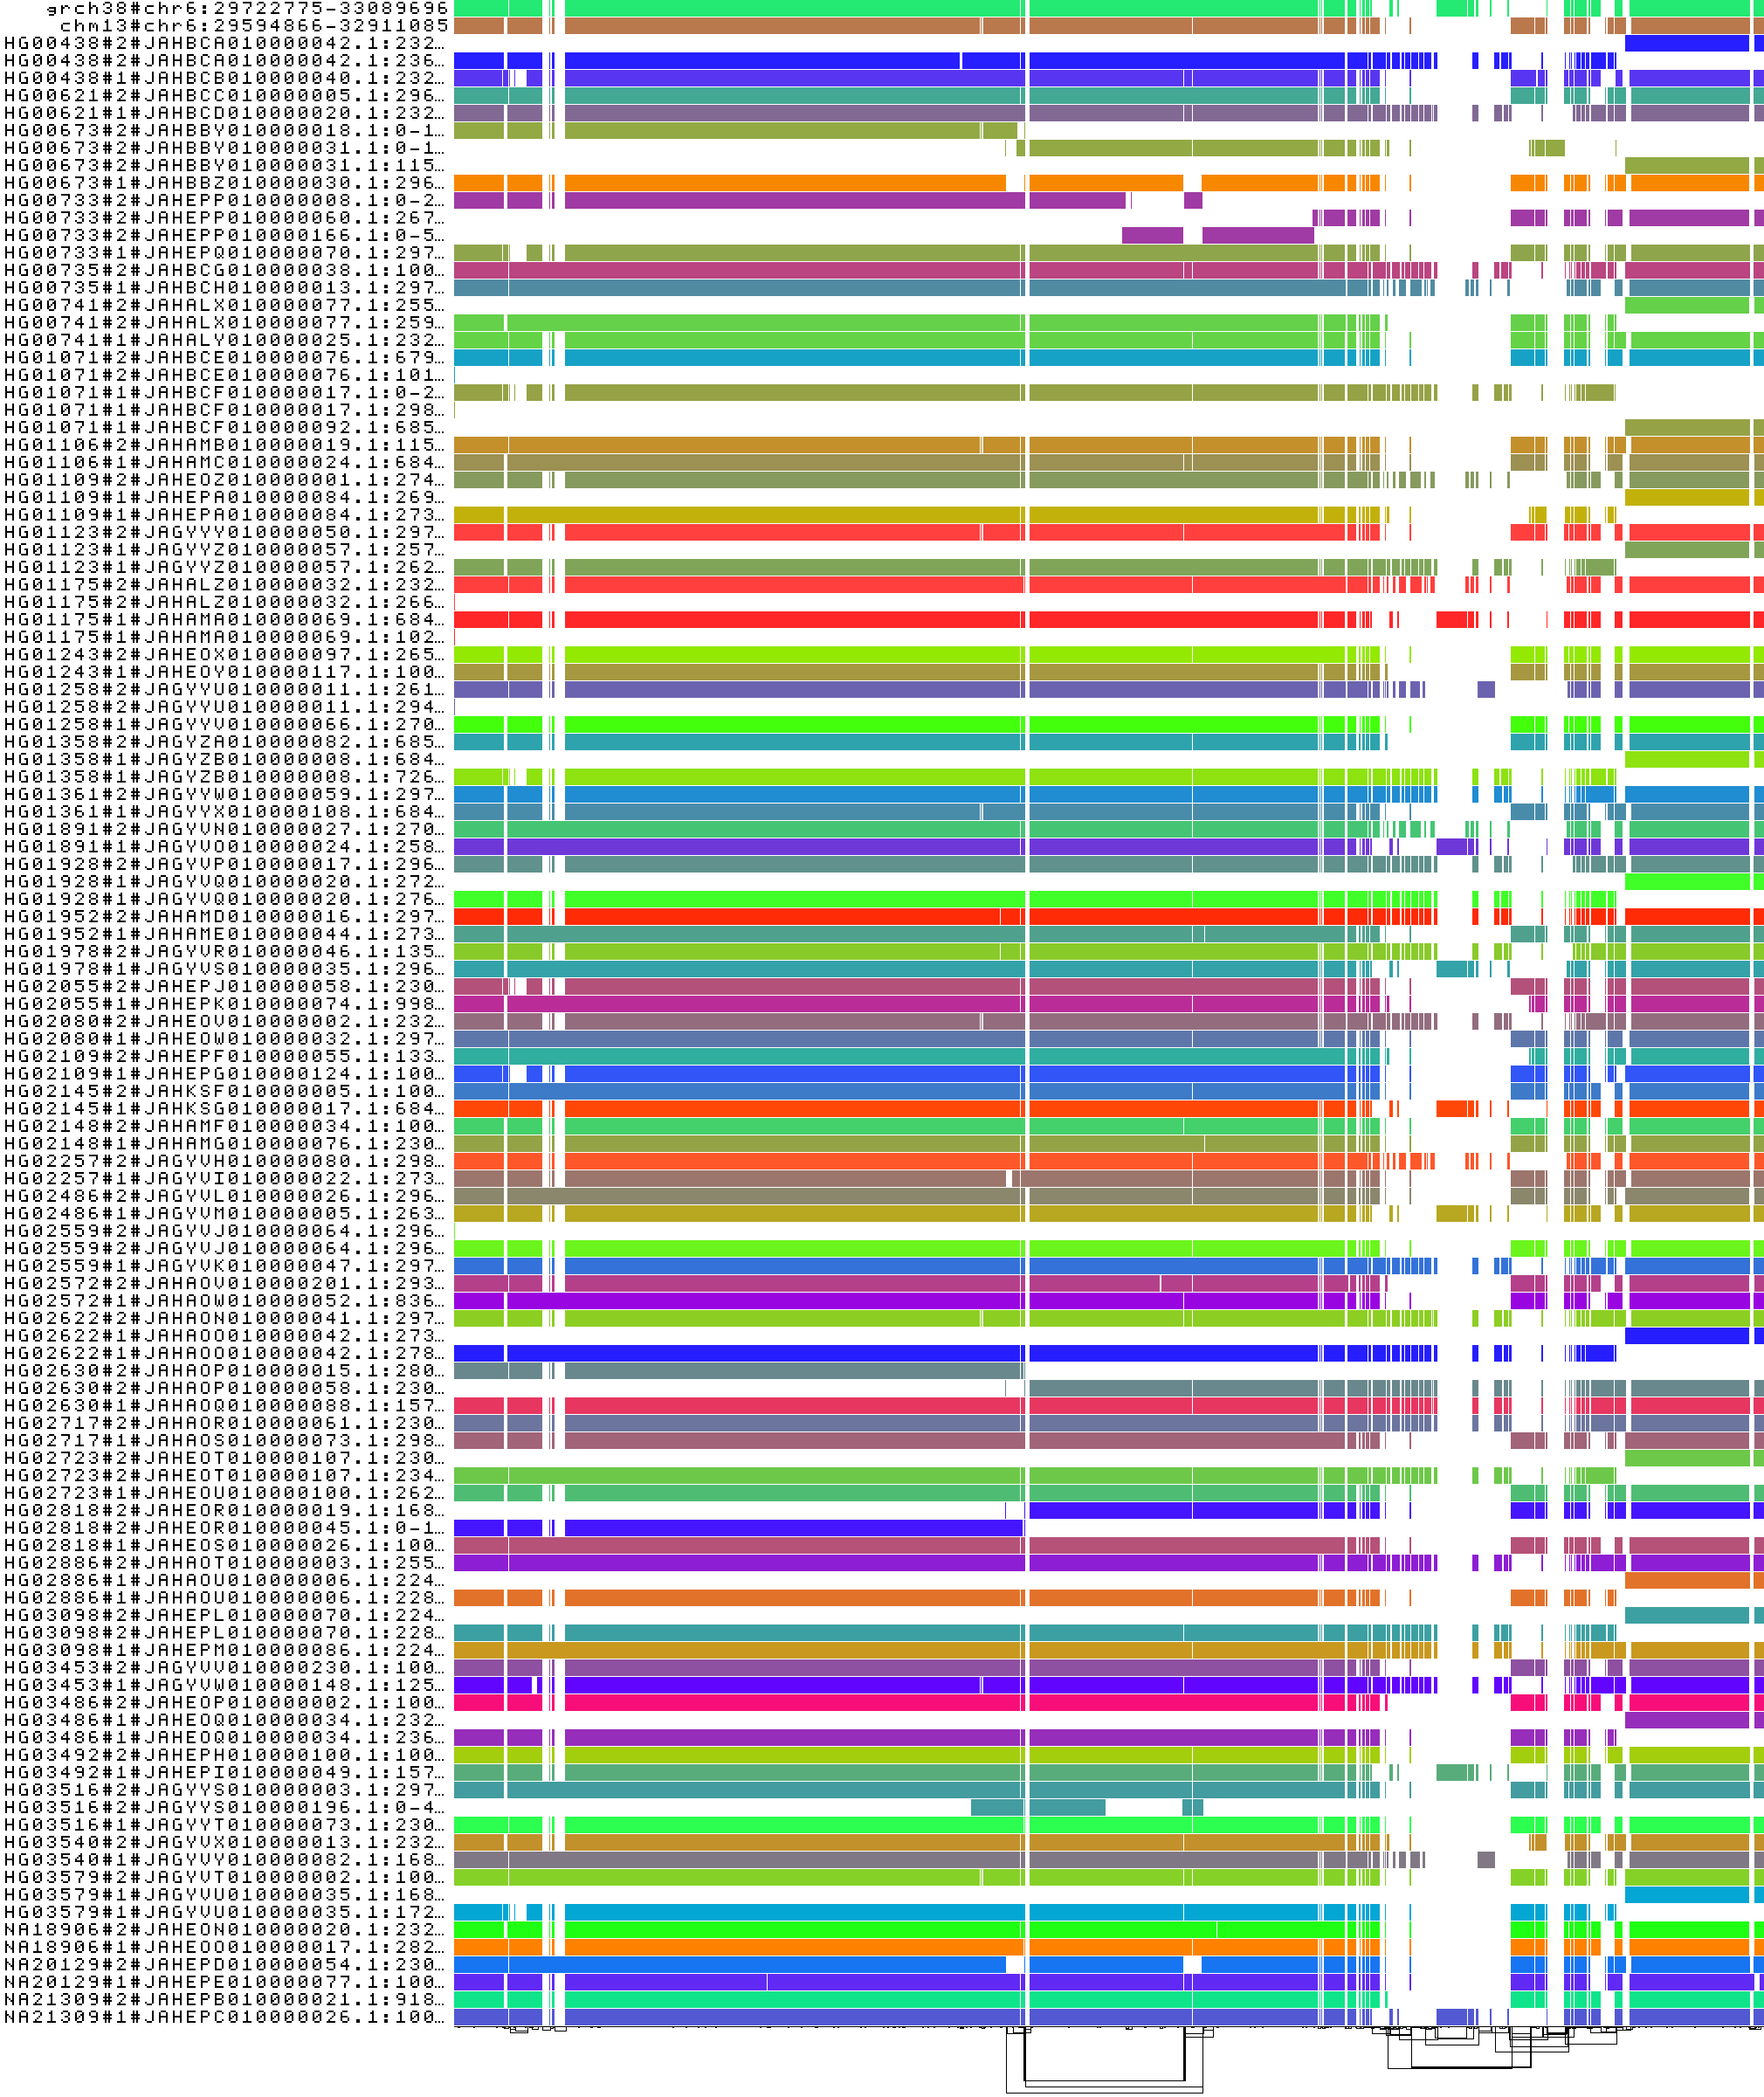

In [38]:
!odgi sort -i chr6.pan.MHC.og -o - -O | odgi viz -i - -o chr6.pan.MHC.png -s '#' -a 20
Image(filename='chr6.pan.MHC.png') 

Why are we using `odgi sort` before visualizing the graph?

Are there haplotypes where the MHC locus is not resolved with a single contig? If so, which ones? Count the number of contigs for each haplotype.

Generate the graph layout with `odgi layout`. (remember to specify the number of threads). Visualize the layout with `odgi draw` Specify `-P` to get information on the progress.

The MHC locus includes the complement component 4 (C4) region, which encodes proteins involved in the complement system. In humans, the C4 gene exists as 2 functionally distinct genes, C4A and C4B, which both vary in structure and copy number ([Sekar et al., 2016](https://www.nature.com/articles/nature16549)). Moreover, C4A and C4B genes segregate in both long and short genomic forms, distinguished by the presence or absence of a human endogenous retroviral (HERV) sequence.

Find C4 coordinates:

In [39]:
!wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes
!wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/genes/hg38.ncbiRefSeq.gtf.gz
!zgrep 'gene_id "C4A"\|gene_id "C4B"' hg38.ncbiRefSeq.gtf.gz | awk '$1 == "chr6"' | cut -f 1,4,5 | bedtools sort | bedtools merge -d 15000 | bedtools slop -l 10000 -r 20000 -g hg38.chrom.sizes | sed 's/chr6/grch38#chr6/g' > hg38.ncbiRefSeq.C4.coordinates.bed

--2024-04-15 14:33:00--  http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11672 (11K)
Saving to: ‘hg38.chrom.sizes’

hg38.chrom.sizes    100%[===================>]  11.40K  --.-KB/s    in 0s      

2024-04-15 14:33:01 (452 MB/s) - ‘hg38.chrom.sizes’ saved [11672/11672]

--2024-04-15 14:33:02--  https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/genes/hg38.ncbiRefSeq.gtf.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41887094 (40M) [application/x-gzip]
Saving to: ‘hg38.ncbiRefSeq.gtf.gz’

hg38.ncbiRefSeq.gtf 100%[===================>]  39.95M  3.

Extract the C4 locus:

In [40]:
!odgi extract -i ../data/chr6.pan.og -b hg38.ncbiRefSeq.C4.coordinates.bed -o - -d 0 -E -t 8 -P | odgi explode -i - --biggest 1 --sorting-criteria P --optimize -p chr6.pan.C4
!odgi sort -i chr6.pan.C4.0.og -o chr6.pan.C4.sorted.og -p Ygs -x 100 -t 8 -P

[odgi::extract] extracting path ranges 100.00% @ 2.00e+00 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
[odgi::extract] collecting all nodes in the path range 100.00% @ 1.07e+04 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
[odgi::extract] adding connecting edges 100.00% @ 1.07e+04 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
[odgi::extract] adding subpaths 100.00% @ 5.63e+02 bp/s elapsed: 00:00:00:07 remain: 00:00:00:00
[odgi::extract] checking missing edges and empty subpaths 100.00% @ 3.60e+02 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
path_sgd_zipf_space_max: 100
path_sgd_zipf_max_number_of_distributions: 101
[odgi::path_linear_sgd] calculating linear SGD schedule (1.18416e-07 1 100 0 0.01)
[odgi::path_linear_sgd] calculating zetas for 102 zipf distributions
[odgi::path_linear_sgd] 1D path-guided SGD: 100.00% @ 3.39e+07 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
[odgi::groom] grooming: 100.00% @ 3.46e+03 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
[odgi::groom] organizing 

What is `odgi explode` is doing?

Regarding the `odgi viz` visualization, select the haplotypes to visualize

In [41]:
!odgi paths -i chr6.pan.C4.sorted.og  -L | grep 'chr6\|HG00438\|HG0107\|HG01952' > chr6.selected_paths.txt

and visualize them:

In [42]:
# odgi viz: default (binned) mode
!odgi viz -i chr6.pan.C4.sorted.og -o chr6.pan.C4.sorted.png -c 12 -w 100 -y 50 -p chr6.selected_paths.txt

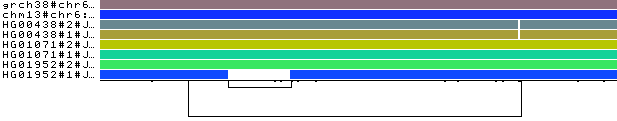

In [43]:
Image(filename='chr6.pan.C4.sorted.png') 

In [44]:
# odgi viz: color by strand
!odgi viz -i chr6.pan.C4.sorted.og -o chr6.pan.C4.sorted.z.png -c 12 -w 100 -y 50 -p chr6.selected_paths.txt -z

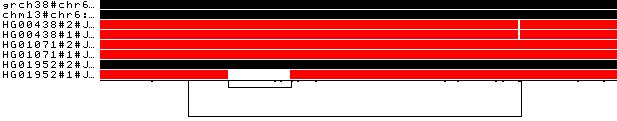

In [45]:
Image(filename='chr6.pan.C4.sorted.z.png') 

In [46]:
# odgi viz: color by position
!odgi viz -i chr6.pan.C4.sorted.og -o chr6.pan.C4.sorted.du.png -c 12 -w 100 -y 50 -p chr6.selected_paths.txt -du

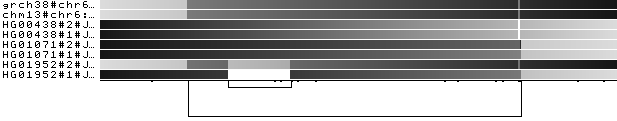

In [47]:
Image(filename='chr6.pan.C4.sorted.du.png') 

In [48]:
# odgi viz: color by depth
!odgi viz -i chr6.pan.C4.sorted.og -o chr6.pan.C4.sorted.m.png -c 12 -w 100 -y 50 -p chr6.selected_paths.txt -m -B Spectral:4

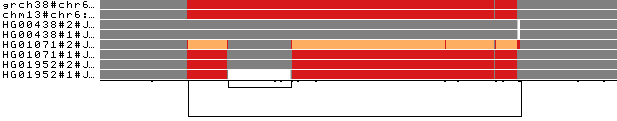

In [49]:
Image(filename='chr6.pan.C4.sorted.m.png') 

For the `chr6.pan.C4.sorted.m.png` image we used the Spectra color palette with 4 levels of node depths, so white indicates no depth, while grey, red, and yellow indicate depth 1, 2, and greater than or equal to 3, respectively. What information does this image provide us about the state of the C4 region in the selected haplotypes?

Visualize all haplotypes with `odgi viz`, coloring by depth. How many haplotypes have three copies of the C4 region? How many haplotypes are missing the HERV sequence? What is the copy number state of the `chm13` and `grch38` reference genomes?

Use `odgi layout` and `odgi draw` to compute and visualize the layout of the C4 locus. Try to find out how to add the following /home/participant/odgi/test/chr6.C4.bed to `odgi draw`'s SVG output. The HERV sequence may be present or absent in the C4 regions across haplotypes: how does this reflect on the structure of the graph?

### Primate chromosome 6

#### Prepare input data

**This is only needed if you use the "lightweight" docker image and need to download/prepare the large files.**
If you are using the docker image from Zenodo (from `curl XXX | docker load`) you can skip this part.

Download the pangenome graph of the primate chromosome 6 in GFA format, decompress it, and convert it to a graph in `odgi` format.

In [52]:
!wget https://zenodo.org/record/7933393/files/primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.gfa.zst
!zstd -d primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.gfa.zst
!odgi build -g primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.gfa -o ../data/primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.og -t 8 -P
!rm primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.gfa

--2024-04-15 14:36:02--  https://zenodo.org/record/7933393/files/primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.gfa.zst
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/7933393/files/primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.gfa.zst [following]
--2024-04-15 14:36:02--  https://zenodo.org/records/7933393/files/primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.gfa.zst
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 693348912 (661M) [application/octet-stream]
Saving to: ‘primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.gfa.zst’

primates14.chr6.fa. 100%[===================>] 661.23M  23.1MB/s    in 72s     

2024-04-15 14:37:14 (9.20 MB/s) - ‘primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.fin

This graph, placed in the `../data` directory (see `-o` parameter), contains contigs of chromosome 6 of six diploid (2 haplotypes for each sample), phased primate genome assemblies, plus the chm13 and grch38 reference genomes. Primate genomes were downloaded from https://genomeark.github.io/t2t-all/.

#### Construct a phylogenetic tree
Compute the dissimilarity (distance) between all possible pairs of haplotypes:

In [53]:
!odgi similarity -i ../data/primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.og --distances -t 8 -D '#' -p 2 -P > primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.dist.tsv

[odgi::similarity] collecting path intersection lengths 100.00% @ 1.63e+06 bp/s elapsed: 00:00:00:21 remain: 00:00:00:00


The `-D` and `-p` options specifies to use the 2nd occurrence of the # character to group the results. As path names follow the PanSN-spec specification, this means that results are grouped by haplotype. Take a look at the output:

In [54]:
!head primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.dist.tsv

group.a	group.b	group.a.length	group.b.length	intersection	jaccard.distance	cosine.distance	dice.distance	estimated.difference.rate	euclidean.distance	manhattan.distance
mGorGor1#1	mGorGor1#1	199266505	199266505	199266505	0	0	0	0	0	0
GRC38#1	chm13#1	170805979	172126628	167949349	0.0401976	0.0205038	0.0205111	0.0205111	2652.15	7033909
mSymSyn1#1	chm13#1	239968396	172126628	103953428	0.662644	0.488509	0.495488	0.495488	14289.4	204188168
mPonPyg2#1	chm13#1	172478504	172126628	131860272	0.380195	0.234716	0.234717	0.234717	8993.59	80884588
mPonAbe1#1	chm13#1	172596066	172126628	130962815	0.387337	0.240184	0.240185	0.240185	9099.29	82797064
mPanTro3#1	chm13#1	183319190	172126628	160032175	0.181059	0.0990943	0.0995411	0.0995411	5948.23	35381468
chm13#1	mPonPyg2#2	172126628	171616562	131906220	0.377322	0.23253	0.23253	0.23253	8940.4	79930750
mPanPan1#1	chm13#1	189100032	172126628	160091101	0.204064	0.112645	0.113625	0.113625	6406.59	41044458
mSymSyn1#2	mPonPyg2#2	232436865	171616562	101148588	

Construct a phylogenetic tree by using the jaccard.distance:

    library(tidyverse)
    library(ape)
    library(ggtree)

    path_dist_tsv <- 'primates14.chr6.fa.gz.667b9b6.c2fac19.ee137be.smooth.final.dist.tsv'

    # Read sparse matrix
    sparse_matrix_df <- read_tsv(path_dist_tsv)

    # Prepare distance matrix
    jaccard_dist_df <- sparse_matrix_df %>%
      arrange(group.a, group.b) %>%
      select(group.a, group.b, dice.distance) %>%
      pivot_wider(names_from = group.b, values_from = dice.distance) %>%
      column_to_rownames(var = "group.a")

    # Clustering
    jaccard_hc <- as.dist(jaccard_dist_df) %>% hclust()

    # Open a pdf device with the specified width and height
    pdf(file = "dendrogram.haplotypes.pdf", width = 5, height = 6)

    # Plot the dendrogram
    plot(
      jaccard_hc,

      # Label at same height
      hang = -1,
      main = 'primate14.chr6',
      xlab = 'Haplotype',
      ylab = 'Jaccard distance',
      sub = '',
      cex = 1.2
    )

    # Close the device and save the file
    dev.off()

In [55]:
!Rscript make_dendrogram_primates.R

System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
In system("timedatectl", intern = TRUE) :
  running command 'timedatectl' had status 1

Attaching package: ‘ape’

The following object is masked from ‘package:dplyr’:

    where

Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      

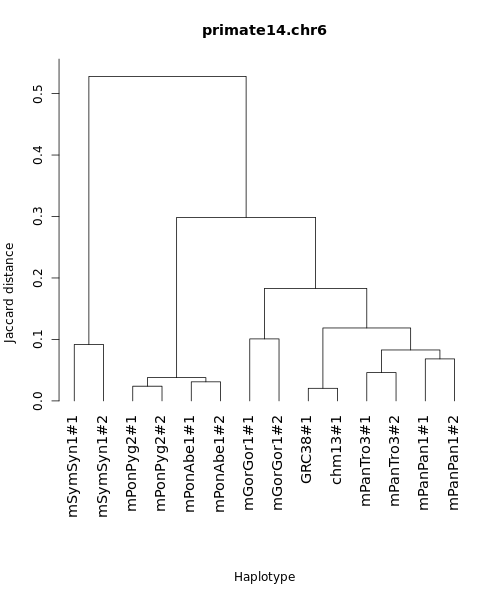

In [56]:
Image(filename='dendrogram.haplotypes.png') 

Try to make the tree by grouping the results by sample.

## Bonus: Pangenome growth curve

### Learning objectives

In this exercise you learn how to

- Evaluate and interpret the growth curve of a pangenome.

### Getting started

Make sure you have `panacus` installed. It is already available on this JupyterHub server.

#### Prepare input data

**This is only needed if you use the "lightweight" docker image and need to download/prepare the large files.**
If you are using the docker image from Zenodo (from `curl XXX | docker load`) you can skip this part.

Download the 44 haplotypes chrM HPRC human pangenome graph ([Liao, Asri, Ebler et al., 2023](https://doi.org/10.1038/s41586-023-05896-x)) from the [HPRC Pangenome Resources](https://github.com/human-pangenomics/hpp_pangenome_resources) and the 50 haplotypes *E. coli* pangenome graph ([Garrison, Guarracino et al., 2023](https://www.biorxiv.org/content/10.1101/2023.04.05.535718v1)):

In [57]:
!wget -c https://s3-us-west-2.amazonaws.com/human-pangenomics/pangenomes/freeze/freeze1/pggb/chroms/chrM.hprc-v1.0-pggb.gfa.gz
!gunzip chrM.hprc-v1.0-pggb.gfa.gz
!mv chrM.hprc-v1.0-pggb.gfa ../data/chrM.gfa
!wget -c https://zenodo.org/record/7937947/files/ecoli50.gfa.zst
!zstd -d ecoli50.gfa.zst
!mv ecoli50.gfa ../data/ecoli50.gfa

--2024-04-15 14:39:51--  https://s3-us-west-2.amazonaws.com/human-pangenomics/pangenomes/freeze/freeze1/pggb/chroms/chrM.hprc-v1.0-pggb.gfa.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.226.168, 52.218.218.248, 52.92.148.24, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.226.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30503 (30K) [binary/octet-stream]
Saving to: ‘chrM.hprc-v1.0-pggb.gfa.gz’

chrM.hprc-v1.0-pggb 100%[===================>]  29.79K   177KB/s    in 0.2s    

2024-04-15 14:39:52 (177 KB/s) - ‘chrM.hprc-v1.0-pggb.gfa.gz’ saved [30503/30503]

--2024-04-15 14:39:52--  https://zenodo.org/record/7937947/files/ecoli50.gfa.zst
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/7937947/files/eco

### `odgi heaps`

`odgi heaps` calculates permutations of the path pangenome coverage in the graph. The number of  permutations affects the accuracy of the subsequent power law regression. This regression happens in this [Rscript](https://github.com/pangenome/odgi/blob/master/scripts/heaps_fit.R) that uses the heap's law ([Tettelin et al., 2008](https://www.sciencedirect.com/science/article/pii/S1369527408001239?via=ihub#section0020)) to calculate a pangenome growth curve from all `odgi heaps` permutations. For more details, take a look at https://en.wikipedia.org/wiki/Pan-genome#Classification.

### `Panacus`

`panacus` is able to calculate the pangenome openness without the need to perform any permutations. Indeed, it directly applies the binomial formula described in [Parmigiani et al., 2022](https://www.biorxiv.org/content/10.1101/2022.11.15.516472v2), Section 2.1, Eq 1.

`panacus` exposes a parameter (`-c`) that allow users to chose which graph feature (sequence, node, edge) is taken into account to calculate the growth histogram  parameter. The coverage `-l` parameter sets the _minimum number_ of haplotypes visiting a graph feature in order for this graph feature to be included into the calculation at all. With `-q` one can set the _minimum fraction_ of haplotypes that must share a graph feature *after each time a haplotype is added to the growth histograph*.

For example, assuming a 100 haplotypes pangenome graph, setting `-c bps -q 0,1,0.5,0.1` would calculate the pangenome growth in sequence scape (`-c bps`) for 4 different cases. Remember, quorum sets the minimum fraction of haplotypes for a nucleotide to be included in the openness calculation.

- without setting any quorum (`-q 0`), so all sequences are considered.
- limited to sequences that are traversed by 100% of haplotypes (`-q 1`). This is the `core pangenome`.
- limited to sequences that are traversed by at least 50% of the haplotypes (`-q 0.5`). This is the `shell pangenome`.
- limited to sequences that are traversed by at least 10% of the haplotypes (`-q 0.1`). This is the `cloud pangenome`.

`panacus` fits two curves, one following heap's law, and one using heap's power law for modeling the data.

### Pangenome growth curve of the HPRC chrM pangenome graph

Create the matrix of path pangenome coverage permutations of the chrM graph with `odgi heaps` subsequently performing the heap's law regression:   

In [58]:
!odgi heaps -i ../data/chrM.gfa -S -n 100 > chrM.gfa.heaps.tsv
!Rscript odgi/scripts/heaps_fit.R chrM.gfa.heaps.tsv chrM.gfa.heaps.tsv.pdf # this should be executed on your local machine

Loading required package: tidyverse
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
In system("timedatectl", intern = TRUE) :
  running command 'timedatectl' had status 1
$par
[1] 0.004538333 0.700419930 0.936214331

$value
[1] 0.7065951

$counts
function gradient 
     128      128 

$convergence
[1] 1

$message
[1] "NEW_X"

[1] 16560
[1] 17632
[1] 80.01989
[1] 12349.8
[1] 16507.33
[1]

Taking a look at the PDF, we can surprisingly observe 2 traces of permutations. *How can this happen*? 

<details>
    
<summary>**Hint**</summary>
    
Take a look at the 1D visualization of the graph.

</details>

<details>

<summary>**Explanation**</summary>
    
The CHM13 reference was linearized differently than all the other mitochondrial sequences. Therefore it has an additional `tip`. `odgi heaps` permutation algorithm is reflecting this, because the permutation always starts with the beginning of each genome.

</details>

So to get a cleaner pangenome growth curve with `odgi heap` we remove the CHM13 reference sequence and run the analysis again:

  

In [59]:
!odgi paths -i ../data/chrM.gfa -L | head -n 1 > chrM.gfa.chm13
!odgi paths -i ../data/chrM.gfa -X chrM.gfa.chm13 -o chrM.gfa.no_chm13.og
!odgi heaps -i chrM.gfa.no_chm13.og -S -n 100 > chrM.gfa.no_chm13.og.heaps.tsv
!Rscript odgi/scripts/heaps_fit.R chrM.gfa.no_chm13.og.heaps.tsv chrM.gfa.heaps.no_chm13.og.tsv.pdf # this should be executed on your local machine 

Loading required package: tidyverse
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
In system("timedatectl", intern = TRUE) :
  running command 'timedatectl' had status 1
$par
[1] 0.4832844 0.0166474 0.4832260

$value
[1] 0.01704253

$counts
function gradient 
      12       12 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

[1] 16560
[1] 17054
[1] 

This looks much better! With every added genome, the number of newly added bases is really low. Let's take a closer look with `panacus`.
    
Create and visualize a growth histogramm of the chrM graph in sequence space with `panacus`:


In [60]:
!RUST_LOG=info panacus histgrowth ../data/chrM.gfa -c bp -q 0,1,0.5,0.1 -t 8 > chrM.gfa.histgrowth.tsv
!panacus-visualize -e -l "lower right" chrM.gfa.histgrowth.tsv > chrM.gfa.histgrowth.tsv.pdf

[2024-04-15T12:40:27Z INFO  panacus::cli] running panacus on 8 threads
[2024-04-15T12:40:27Z INFO  panacus::cli] constructing indexes for node/edge IDs, node lengths, and P/W lines..
[2024-04-15T12:40:27Z INFO  panacus::cli] ..done; found 44 paths/walks and 1395 nodes
[2024-04-15T12:40:27Z INFO  panacus::cli] loading data from group / subset / exclude files
[2024-04-15T12:40:27Z INFO  panacus::abacus] no explicit grouping instruction given, group paths by their IDs (sample ID+haplotype ID+seq ID)
[2024-04-15T12:40:27Z INFO  panacus::cli] loading graph from ../data/chrM.gfa
[2024-04-15T12:40:27Z INFO  panacus::abacus] parsing path + walk sequences
[2024-04-15T12:40:27Z INFO  panacus::abacus] counting abacus entries..
[2024-04-15T12:40:27Z INFO  panacus::cli] abacus has 44 path groups and 1396 countables
[2024-04-15T12:40:27Z INFO  panacus::cli] constructing histogram..
[2024-04-15T12:40:27Z INFO  panacus::hist] calculating growth for coverage >= 1A and quorum >= 0R
[2024-04-15T12:40:27Z

[chrM.gfa.histgrowth.tsv.pdf](chrM.gfa.histgrowth.tsv.pdf)

### Pangenome growth curve of the *E. coli* pangenome graph

In [61]:
!odgi heaps -i ../data/ecoli50.gfa -S -n 100 -t 8 -P > ecoli50.gfa.heaps.tsv

[odgi::heaps] warning: the given file "../data/ecoli50.gfa" is not in ODGI format. To save time in the future, please use odgi build -i=[FILE], --idx=[FILE] -o=[FILE], --out=[FILE] to generate a graph in ODGI format. Such a graph can be supplied to all ODGI subcommands. Building graph in ODGI format from given GFA.
[odgi::gfa_to_handle] building nodes: 100.00% @ 2.94e+06 bp/s elapsed: 00:00:00:00 remain: 00:00:00:00
[odgi::gfa_to_handle] building edges: 100.00% @ 2.12e+06 bp/s elapsed: 00:00:00:01 remain: 00:00:00:00
[odgi::gfa_to_handle] building paths: 100.00% @ 1.43e+01 bp/s elapsed: 00:00:00:03 remain: 00:00:00:00


In [62]:
!Rscript odgi/scripts/heaps_fit.R ecoli50.gfa.heaps.tsv ecoli50.gfa.heaps.tsv.pdf

Loading required package: tidyverse
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
In system("timedatectl", intern = TRUE) :
  running command 'timedatectl' had status 1
$par
[1] 0.1184803 0.5018749 0.1537006

$value
[1] 2.35369

$counts
function gradient 
      40       40 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

[1] 4403450
[1] 18147015
[1

[ecoli50.gfa.heaps.tsv.pdf](ecoli50.gfa.heaps.tsv.pdf)

With every added genome, the number of newly added bases is at least 100k.  Let's take a closer look with `panacus`.

Create and visualize a growth histograph of the *E. coli* graph in sequence space with `panacus`:
    

In [63]:
!RUST_LOG=info panacus histgrowth ../data/ecoli50.gfa -c bp -q 0,1,0.5,0.1 -t 8 > ecoli50.gfa.histgrowth.tsv
!panacus-visualize -e -l "upper left" ecoli50.gfa.histgrowth.tsv > ecoli50.gfa.histgrowth.tsv.pdf

[2024-04-15T12:41:55Z INFO  panacus::cli] running panacus on 8 threads
[2024-04-15T12:41:55Z INFO  panacus::cli] constructing indexes for node/edge IDs, node lengths, and P/W lines..
[2024-04-15T12:41:55Z INFO  panacus::cli] ..done; found 50 paths/walks and 1553667 nodes
[2024-04-15T12:41:55Z INFO  panacus::cli] loading data from group / subset / exclude files
[2024-04-15T12:41:55Z INFO  panacus::abacus] no explicit grouping instruction given, group paths by their IDs (sample ID+haplotype ID+seq ID)
[2024-04-15T12:41:55Z INFO  panacus::cli] loading graph from ../data/ecoli50.gfa
[2024-04-15T12:41:55Z INFO  panacus::abacus] parsing path + walk sequences
[2024-04-15T12:42:09Z INFO  panacus::abacus] counting abacus entries..
[2024-04-15T12:42:09Z INFO  panacus::cli] abacus has 50 path groups and 1553668 countables
[2024-04-15T12:42:09Z INFO  panacus::cli] constructing histogram..
[2024-04-15T12:42:09Z INFO  panacus::hist] calculating growth for coverage >= 1A and quorum >= 0R
[2024-04-15T

[ecoli50.gfa.histgrowth.tsv.pdf](ecoli50.gfa.histgrowth.tsv.pdf)

Taking a look at the top Figure in the PDF there is a polynomial growth of the number of nucleotides with increasing number of genomes visible. 

The bottom Figure shows the added number of bases per added individual. Even the 50th added individual adds more than 100k new bases to the pangenome. In conclusion, the *E. coli* pangenome is open. The core pangenome (`quorum >= 1`) is quite small, with the shell pangenome (`quorum >= 0.5`) not adding much more sequence, and the cloud pangenome (`quorum >= 0.1`) adding some more sequence. 